In [1]:
import pandas as pd
import copy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
from pandas import DataFrame, Series
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline

path = './results/'

In [2]:
#### Compile a dataframe of mean genotypic values within the hybrid zone for trait 1 & 2 and calculate mean ####    
def swamping(data):    
    rep_counter = 1
    row = 0
    trait1swamp = pd.DataFrame({'generation': list(range(1,500))})
    trait2swamp = pd.DataFrame({'generation': list(range(1,500))})
    while rep_counter <= reps:
        if rep_counter == data.ix[row,0]:
            trait1 = []
            trait2 = []          
            while rep_counter == data.ix[row,0]:
                if data.ix[row,1] > 10001 and data.ix[row,1] < 10500:
                    trait1.append(data.ix[row,7])
                    trait2.append(data.ix[row,10])
                    row = row+1
                elif data.ix[row,1] == 10500:
                    trait1.append(data.ix[row,7])
                    trait2.append(data.ix[row,10])
                    trait1swamp = pd.concat([trait1swamp, pd.DataFrame({''.join(['t1replicate',str(rep_counter)]): trait1})], axis=1)
                    trait2swamp = pd.concat([trait2swamp, pd.DataFrame({''.join(['t2replicate',str(rep_counter)]): trait2})], axis=1)
                    rep_counter = rep_counter+1
                else:
                    row = row+1
        elif rep_counter == data.ix[row,0]+1:
            while rep_counter == data.ix[row,0]+1:
                row = row+1
    mean_t1 = []
    mean_t2 = []
    for row in range(trait1swamp.shape[0]): mean_t1.append((sum(trait1swamp.ix[row,1:(reps+1)]))/reps)
    trait1swamp = pd.concat([trait1swamp, pd.DataFrame({'mean': mean_t1})], axis=1)
    for row in range(trait2swamp.shape[0]): mean_t2.append((sum(trait2swamp.ix[row,1:(reps+1)]))/reps)
    trait2swamp = pd.concat([trait2swamp, pd.DataFrame({'mean': mean_t2})], axis=1)
    out = [trait1swamp, trait2swamp]
    return out

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
.ix is depre

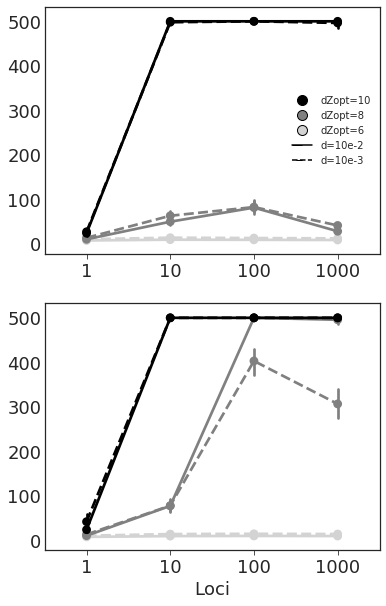

In [3]:
#### lag interactions plot ####

data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1l_d01_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt3_10l_d01_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt3_100l_d01_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1000l_d01_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1l_d01_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt5_10l_d01_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt5_100l_d01_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1000l_d01_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 5})])

data2 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1l_d001_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt3_10l_d001_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt3_100l_d001_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1000l_d001_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1l_d001_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt5_10l_d001_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt5_100l_d001_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1000l_d001_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 5})])

data3 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4},)])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1l_d01_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 3})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt3_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 3})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt3_100l_d01_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 3})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1000l_d01_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 3})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1l_d01_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 5})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt5_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 5})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt5_100l_d01_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 5})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1000l_d01_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 5})])

data4 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1l_d001_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 3})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt3_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 3})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt3_100l_d001_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 3})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt3_1000l_d001_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 3})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1l_d001_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 5})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt5_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 5})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt5_100l_d001_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 5})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt5_1000l_d001_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 5})])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(6,10))
    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0))    
    sns.catplot(y='lag', x='loci', data=data1, ax=ax1, hue='zopt', kind="point", n_boot=1000, markers="o", s=10, palette={3:'lightgrey',4:'grey',5:'black'}, linewidth=0.75)
    sns.catplot(y='lag', x='loci', data=data2, ax=ax1, hue='zopt', kind="point", n_boot=1000, markers='o', s=10, linestyles="--", palette={3:'lightgrey',4:'grey',5:'black'}, linewidth=0.75)
    sns.catplot(y='lag', x='loci', data=data3, ax=ax2, hue='zopt', kind="point", n_boot=1000, markers='o', s=10, palette={3:'lightgrey',4:'grey',5:'black'}, linewidth=0.75)
    sns.catplot(y='lag', x='loci', data=data4, ax=ax2, hue='zopt', kind="point", n_boot=1000, markers='o', s=10, linestyles="--", palette={3:'lightgrey',4:'grey',5:'black'}, linewidth=0.75)
    legend_summary = [Line2D([0],[0], marker='o', markerfacecolor='black',color='white',markeredgecolor='black',markersize=10,label='dZopt=10'),
              Line2D([0],[0], marker='o', markerfacecolor='grey',color='white',markeredgecolor='black',markersize=10,label='dZopt=8'),
              Line2D([0],[0], marker='o', markerfacecolor='lightgrey',color='white',markeredgecolor='black',markersize=10,label='dZopt=6'),
              Line2D([0],[0], marker=False, markerfacecolor='white',color='black',markeredgecolor='black',markersize=10,label='d=10e-2'),
              Line2D([0],[0], marker=False, linestyle="--",color='black',label='d=10e-3')]
    ax1.legend(handles=legend_summary, loc='center right')
    ax2.get_legend().remove()
    ax1.set_ylabel('Lag phase duration', fontsize=18)
    ax2.set_ylabel('Lag phase duration', fontsize=18)
    ax2.set_xlabel('Loci', fontsize=18)
    ax1.tick_params(axis='x', labelsize=18, direction='out', length=5)
    ax2.tick_params(axis='x', labelsize=18, direction='out', length=5)
    ax1.tick_params(axis='y', labelsize=18)
    ax2.tick_params(axis='y', labelsize=18)
    ax1.set_xlabel('', fontsize=18)
    ax1.set_ylabel('', fontsize=18)
    ax2.set_ylabel('', fontsize=18)
    ax1.set_xticklabels(['1','10','100','1000'])
    ax2.set_xticklabels(['1','10','100','1000'])
    plt.close(2)
    plt.close(3)
    plt.close(4)
    plt.close(5)
    plt.savefig(path+'lag_interactions.png')

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

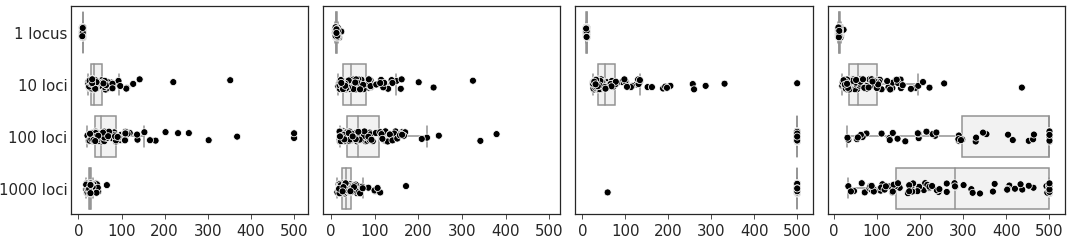

In [4]:
#### Generate box plots of lag phase duration subplot for baseline sims ####

data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])

data2 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])

data3 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])

data4 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data4 = pd.concat([data4, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15,3.5))
    ax1 = plt.subplot2grid((1,4), (0,0))
    ax2 = plt.subplot2grid((1,4), (0,1))
    ax3 = plt.subplot2grid((1,4), (0,2))
    ax4 = plt.subplot2grid((1,4), (0, 3))
    
    sns.stripplot(y='loci', x='lag', data=data1, jitter=True, ax = ax1, color='black',edgecolor='white', s=7, linewidth=0.75)
    sns.boxplot(y='loci', x='lag', data=data1, color='white', ax = ax1, hue='zopt', showfliers=False)
    sns.stripplot(y='loci', x='lag', data=data2, jitter=True, ax = ax2, color='black',edgecolor='white', s=7, linewidth=0.75)
    sns.boxplot(y='loci', x='lag', data=data2, color='white', ax = ax2, hue='zopt', showfliers=False)
    sns.stripplot(y='loci', x='lag', data=data3, jitter=True, ax = ax3, color='black',edgecolor='white', s=7, linewidth=0.75)
    sns.boxplot(y='loci', x='lag', data=data3, color='white', ax = ax3, hue='zopt', showfliers=False)
    sns.stripplot(y='loci', x='lag', data=data4, jitter=True, ax = ax4, color='black',edgecolor='white', s=7, linewidth=0.75)
    sns.boxplot(y='loci', x='lag', data=data4, color='white', ax = ax4, hue='zopt', showfliers=False)
    ax2.plot(500, 0, color='white')

    ax1.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax1.tick_params(axis='y', labelsize=15)
    ax1.set_xticks(np.arange(0,520,100))
    ax1.set_xlabel('', fontsize=16)
    ax2.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax2.tick_params(axis='y', labelleft=False)
    ax2.set_xticks(np.arange(0,520,100))
    ax2.set_xlabel('', fontsize=16)
    ax3.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax3.tick_params(axis='y', labelleft=False)
    ax3.set_xticks(np.arange(0,520,100))
    ax3.set_xlabel('', fontsize=16)
    ax4.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax4.tick_params(axis='y', labelleft=False)
    ax4.set_xticks(np.arange(0,520,100))
    ax4.set_xlabel('', fontsize=16)
    
    ax1.set_title('', fontsize=20)
    ax2.set_title('', fontsize=20)
    ax3.set_title('', fontsize=20)
    ax4.set_title('', fontsize=20)
    ax1.set_ylabel('', fontsize=20)
    ax2.set_ylabel('', fontsize=20)
    ax3.set_ylabel('', fontsize=20)
    ax4.set_ylabel('', fontsize=20)
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()  
    plt.tight_layout()
    plt.savefig(path+'lag.png')

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\BReat\Anaconda3\lib

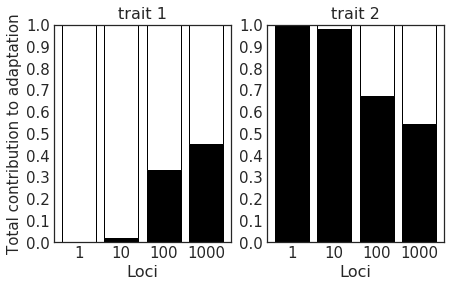

In [5]:
#### Generate source of adaptive alleles subplot for baseline architectures ####

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7,4))
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax2 = plt.subplot2grid((1,2), (0,1))
    
    l1=pd.read_csv(path+'opt4_1l_d01_u4_source.csv')
    l10=pd.read_csv(path+'opt4_10l_d01_u4_source.csv')
    l100=pd.read_csv(path+'opt4_100l_d01_u4_source.csv')
    l1000=pd.read_csv(path+'opt4_1000l_d01_u4_source.csv')
    l1 = l1.fillna(0)
    
    #### Trait 1 source ####
    l1_t1 = np.mean(l1.ix[:,3])/np.sum(np.mean(l1.ix[:,3])+np.mean(l1.ix[:,5]))  
    l10_t1 = np.mean(l10.ix[:,3])/np.sum(np.mean(l10.ix[:,3])+np.mean(l10.ix[:,5]))
    l100_t1 = np.mean(l100.ix[:,3])/np.sum(np.mean(l100.ix[:,3])+np.mean(l100.ix[:,5]))
    l1000_t1 = np.mean(l1000.ix[:,3])/np.sum(np.mean(l1000.ix[:,3])+np.mean(l1000.ix[:,5]))
    t1_blackbars=[l1_t1,l10_t1,l100_t1,l1000_t1]
    
    l1_t1 = np.mean(l1.ix[:,5])/np.sum(np.mean(l1.ix[:,3])+np.mean(l1.ix[:,5]))  
    l10_t1 = np.mean(l10.ix[:,5])/np.sum(np.mean(l10.ix[:,3])+np.mean(l10.ix[:,5]))
    l100_t1 = np.mean(l100.ix[:,5])/np.sum(np.mean(l100.ix[:,3])+np.mean(l100.ix[:,5]))
    l1000_t1 = np.mean(l1000.ix[:,5])/np.sum(np.mean(l1000.ix[:,3])+np.mean(l1000.ix[:,5]))
    t1_whitebars=[l1_t1,l10_t1,l100_t1,l1000_t1]
    
    #### Trait 2 source ####
    l1_t2 = np.mean(l1.ix[:,7])/np.sum(np.mean(l1.ix[:,7])+np.mean(l1.ix[:,9]))  
    l10_t2 = np.mean(l10.ix[:,7])/np.sum(np.mean(l10.ix[:,7])+np.mean(l10.ix[:,9]))
    l100_t2 = np.mean(l100.ix[:,7])/np.sum(np.mean(l100.ix[:,7])+np.mean(l100.ix[:,9]))
    l1000_t2 = np.mean(l1000.ix[:,7])/np.sum(np.mean(l1000.ix[:,7])+np.mean(l1000.ix[:,9]))
    t2_blackbars=[l1_t2,l10_t2,l100_t2,l1000_t2]
    
    l1_t2 = np.mean(l1.ix[:,9])/np.sum(np.mean(l1.ix[:,7])+np.mean(l1.ix[:,9]))  
    l10_t2 = np.mean(l10.ix[:,9])/np.sum(np.mean(l10.ix[:,7])+np.mean(l10.ix[:,9]))
    l100_t2 = np.mean(l100.ix[:,9])/np.sum(np.mean(l100.ix[:,7])+np.mean(l100.ix[:,9]))
    l1000_t2 = np.mean(l1000.ix[:,9])/np.sum(np.mean(l1000.ix[:,7])+np.mean(l1000.ix[:,9]))
    t2_whitebars=[l1_t2,l10_t2,l100_t2,l1000_t2]
    
    N = 4
    ind = np.arange(N)
    width = 0.8
    ax1.bar(ind, t1_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax1.bar(ind, t1_whitebars, width, bottom=t1_blackbars, color='white', linewidth=1, edgecolor='black')
    ax2.bar(ind, t2_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax2.bar(ind, t2_whitebars, width, bottom=t2_blackbars, color='white', linewidth=1, edgecolor='black')
    ax1.set_title('trait 1', fontsize=16)
    ax2.set_title('trait 2', fontsize=16)
    ax1.set_ylabel('Total contribution to adaptation', fontsize=15)
    ax1.set_xlabel('Loci', fontsize=16)
    ax2.set_xlabel('Loci', fontsize=16)
    ax1.set_yticks(np.arange(0,1.1,0.1))
    ax2.set_yticks(np.arange(0,1.1,0.1))
    ax1.set_ylim(0,1)
    ax2.set_ylim(0,1)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    ax1.set_xticks(np.arange(0,4,1))
    ax2.set_xticks(np.arange(0,4,1))
    ax1.set_xticklabels(['1','10','100','1000'])
    ax2.set_xticklabels(['1','10','100','1000'])
    ax2.axis('tight')
    plt.savefig(path+'source.png')

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\BReat\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.

No handles with labels found to put in legend.


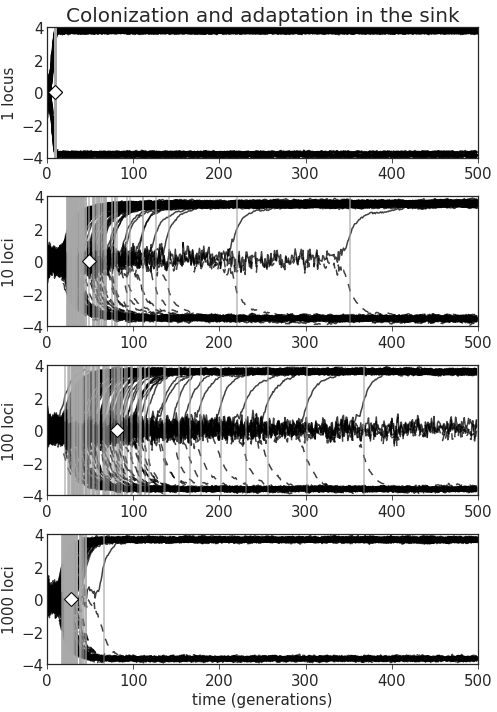

In [6]:
#### Generate adaptation to the sink subplot for baseline architectures ####

l1_d01 = pd.read_table(path+'opt4_1l_d01_u4_stats.txt', delim_whitespace = True)
l10_d01 = pd.read_table(path+'opt4_10l_d01_u4_stats.txt', delim_whitespace = True)
l100_d01 = pd.read_table(path+'opt4_100l_d01_u4_stats.txt', delim_whitespace = True)
l1000_d01 = pd.read_table(path+'opt4_1000l_d01_u4_stats.txt', delim_whitespace = True)
reps=100
swamp1 = swamping(l1_d01)
swamp10 = swamping(l10_d01)
swamp100 = swamping(l100_d01)
swamp1000 = swamping(l1000_d01)
data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'zopt': 4})
data10 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})
data100 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})
data1000 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'zopt': 4})

gens = 'black'
lags = 'darkgrey'

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7,10))
    ax1 = plt.subplot2grid((4,1), (0,0))
    ax2 = plt.subplot2grid((4,1), (1,0))
    ax3 = plt.subplot2grid((4,1), (2,0))
    ax4 = plt.subplot2grid((4,1), (3,0))
    #### Subplot for 1 locus sims
    for trait in swamp1[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax1.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax1.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data1.ix[:,0])):
            ax1.axvline(int(data1.ix[rep,0]), color=lags, alpha=0.5)
        ax1.plot(np.mean(data1.ix[:,0]), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')
    #### Subplot for 10 locus sims
    for trait in swamp10[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax2.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax2.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data10.ix[:,0])):
            ax2.axvline(int(data10.ix[rep,0]), color=lags, alpha=0.5)
        ax2.plot(np.mean(data10.ix[:,0]), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')
    #### Subplot for 100 locus sims
    for trait in swamp100[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax3.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax3.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data100.ix[:,0])):
            ax3.axvline(int(data100.ix[rep,0]), color=lags, alpha=0.5)
        ax3.plot(np.mean(data100.ix[:,0]), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')
    #### Subplot for 1000 locus sims
    for trait in swamp1000[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax4.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax4.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data1000.ix[:,0])):
            ax4.axvline(int(data1000.ix[rep,0]), color=lags, alpha=0.5)
        ax4.plot(np.mean(data1000.ix[:,0]), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')
        
        ax1.set_title('Colonization and adaptation in the sink', fontsize=20)
        ax1.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax1.tick_params(axis='y', labelsize=15)
        ax1.set_ylabel('1 locus', fontsize=15)
        ax2.set_ylabel('10 loci', fontsize=15)
        ax2.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax2.tick_params(axis='y', labelsize=15)
        ax3.set_ylabel('100 loci', fontsize=15)
        ax3.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax3.tick_params(axis='y', labelsize=15)
        ax4.set_ylabel('1000 loci', fontsize=15)
        ax4.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax4.tick_params(axis='y', labelsize=15)
        ax4.set_xlabel('time (generations)', fontsize=15)
        ax1.set_xlim([0, 500])
        ax2.set_xlim([0, 500])
        ax3.set_xlim([0, 500])
        ax4.set_xlim([0, 500])
        ax1.set_ylim([-4, 4])
        ax2.set_ylim([-4, 4])
        ax3.set_ylim([-4, 4])
        ax4.set_ylim([-4, 4])
        ax1.legend(loc = 'center right', fontsize = 14)
        plt.tight_layout()
        plt.savefig(path+'adaptation.png')


C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

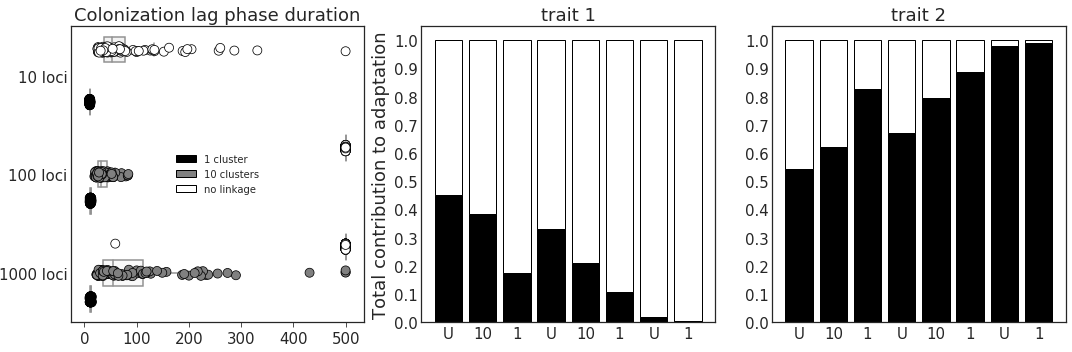

In [7]:
#### Generate box plots of lag phase duration and source of adaptive alleles for linkage sims ####

data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'linkage': 'no linkage'})
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'linkage': 'no linkage'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_1link_lag.csv').ix[:,2], 'loci': '10 loci', 'linkage': '1 cluster'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u5_10link_lag.csv').ix[:,2], 'loci': '100 loci', 'linkage': '10 clusters'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u5_1link_lag.csv').ix[:,2], 'loci': '100 loci', 'linkage': '1 cluster'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u5_1link_lag.csv').ix[:,2], 'loci': '1000 loci', 'linkage': '1 cluster'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u5_10link_lag.csv').ix[:,2], 'loci': '1000 loci', 'linkage': '10 clusters'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'linkage': 'no linkage'})])
l10_0link=pd.read_csv(path+'opt4_10l_d01_u4_source.csv')
l10_1link=pd.read_csv(path+'opt4_10l_d01_u5_1link_source.csv')
l100_0link=pd.read_csv(path+'opt4_100l_d01_u4_source.csv')
l100_1link=pd.read_csv(path+'opt4_100l_d01_u5_1link_source.csv')
l100_10link=pd.read_csv(path+'opt4_100l_d01_u5_10link_source.csv')
l1000_0link=pd.read_csv(path+'opt4_1000l_d01_u4_source.csv')
l1000_1link=pd.read_csv(path+'opt4_1000l_d01_u5_1link_source.csv')
l1000_10link=pd.read_csv(path+'opt4_1000l_d01_u5_10link_source.csv')

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot2grid((1,3), (0,0))
    ax2 = plt.subplot2grid((1,3), (0,1))
    ax3 = plt.subplot2grid((1,3), (0,2))
    
    sns.stripplot(y='loci', x='lag', data=data1, jitter=True, ax = ax1, hue_order= ['no linkage', '10 clusters', '1 cluster'], hue='linkage', palette=['white','grey','black'], dodge=True, s=9, linewidth=0.75)
    sns.boxplot(y='loci', x='lag', data=data1, color='white', ax = ax1, hue_order= ['no linkage', '10 clusters', '1 cluster'], hue='linkage', showfliers=False)

    ax1.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax1.tick_params(axis='y', labelsize=15)
    ax1.set_xticks(np.arange(0,520,100))
    ax1.set_xlabel('', fontsize=16)
    ax1.set_title('', fontsize=20)
    ax1.set_ylabel('', fontsize=20)
    legend_summary = [Patch(facecolor='black', edgecolor='black', label= '1 cluster'),
             Patch(facecolor='grey', edgecolor='black', label= '10 clusters'),
             Patch(facecolor='white', edgecolor='black', label= 'no linkage')]
    ax1.legend(handles=legend_summary, loc='center')
    plt.tight_layout()

    
    dispersal = '01'
    
    #### Trait 1 ####
    l10_0link_t1 = np.mean(l10_0link.ix[:,3])/np.sum(np.mean(l10_0link.ix[:,3])+np.mean(l10_0link.ix[:,5]))  
    l10_1link_t1 = np.mean(l10_1link.ix[:,3])/np.sum(np.mean(l10_1link.ix[:,3])+np.mean(l10_1link.ix[:,5]))
    l100_0link_t1 = np.mean(l100_0link.ix[:,3])/np.sum(np.mean(l100_0link.ix[:,3])+np.mean(l100_0link.ix[:,5]))
    l100_1link_t1 = np.mean(l100_1link.ix[:,3])/np.sum(np.mean(l100_1link.ix[:,3])+np.mean(l100_1link.ix[:,5]))
    l100_10link_t1 = np.mean(l100_10link.ix[:,3])/np.sum(np.mean(l100_10link.ix[:,3])+np.mean(l100_10link.ix[:,5]))
    l1000_0link_t1 = np.mean(l1000_0link.ix[:,3])/np.sum(np.mean(l1000_0link.ix[:,3])+np.mean(l1000_0link.ix[:,5]))
    l1000_1link_t1 = np.mean(l1000_1link.ix[:,3])/np.sum(np.mean(l1000_1link.ix[:,3])+np.mean(l1000_1link.ix[:,5]))
    l1000_10link_t1 = np.mean(l1000_10link.ix[:,3])/np.sum(np.mean(l1000_10link.ix[:,3])+np.mean(l1000_10link.ix[:,5]))
    t1_blackbars=[l1000_0link_t1,l1000_10link_t1,l1000_1link_t1,l100_0link_t1,l100_10link_t1,l100_1link_t1,l10_0link_t1,l10_1link_t1]
    
    l10_0link_t1 = np.mean(l10_0link.ix[:,5])/np.sum(np.mean(l10_0link.ix[:,3])+np.mean(l10_0link.ix[:,5]))  
    l10_1link_t1 = np.mean(l10_1link.ix[:,5])/np.sum(np.mean(l10_1link.ix[:,3])+np.mean(l10_1link.ix[:,5]))
    l100_0link_t1 = np.mean(l100_0link.ix[:,5])/np.sum(np.mean(l100_0link.ix[:,3])+np.mean(l100_0link.ix[:,5]))
    l100_1link_t1 = np.mean(l100_1link.ix[:,5])/np.sum(np.mean(l100_1link.ix[:,3])+np.mean(l100_1link.ix[:,5]))
    l100_10link_t1 = np.mean(l100_10link.ix[:,5])/np.sum(np.mean(l100_10link.ix[:,3])+np.mean(l100_10link.ix[:,5]))
    l1000_0link_t1 = np.mean(l1000_0link.ix[:,5])/np.sum(np.mean(l1000_0link.ix[:,3])+np.mean(l1000_0link.ix[:,5]))
    l1000_1link_t1 = np.mean(l1000_1link.ix[:,5])/np.sum(np.mean(l1000_1link.ix[:,3])+np.mean(l1000_1link.ix[:,5]))
    l1000_10link_t1 = np.mean(l1000_10link.ix[:,5])/np.sum(np.mean(l1000_10link.ix[:,3])+np.mean(l1000_10link.ix[:,5]))
    t1_whitebars=[l1000_0link_t1,l1000_10link_t1,l1000_1link_t1,l100_0link_t1,l100_10link_t1,l100_1link_t1,l10_0link_t1,l10_1link_t1]
    
    l10_0link_t2 = np.mean(l10_0link.ix[:,7])/np.sum(np.mean(l10_0link.ix[:,7])+np.mean(l10_0link.ix[:,9]))  
    l10_1link_t2 = np.mean(l10_1link.ix[:,7])/np.sum(np.mean(l10_1link.ix[:,7])+np.mean(l10_1link.ix[:,9]))
    l100_0link_t2 = np.mean(l100_0link.ix[:,7])/np.sum(np.mean(l100_0link.ix[:,7])+np.mean(l100_0link.ix[:,9]))
    l100_1link_t2 = np.mean(l100_1link.ix[:,7])/np.sum(np.mean(l100_1link.ix[:,7])+np.mean(l100_1link.ix[:,9]))
    l100_10link_t2 = np.mean(l100_10link.ix[:,7])/np.sum(np.mean(l100_10link.ix[:,7])+np.mean(l100_10link.ix[:,9]))
    l1000_0link_t2 = np.mean(l1000_0link.ix[:,7])/np.sum(np.mean(l1000_0link.ix[:,7])+np.mean(l1000_0link.ix[:,9]))
    l1000_1link_t2 = np.mean(l1000_1link.ix[:,7])/np.sum(np.mean(l1000_1link.ix[:,7])+np.mean(l1000_1link.ix[:,9]))
    l1000_10link_t2 = np.mean(l1000_10link.ix[:,7])/np.sum(np.mean(l1000_10link.ix[:,7])+np.mean(l1000_10link.ix[:,9]))
    t2_blackbars=[l1000_0link_t2,l1000_10link_t2,l1000_1link_t2,l100_0link_t2,l100_10link_t2,l100_1link_t2,l10_0link_t2,l10_1link_t2]
    
    l10_0link_t2 = np.mean(l10_0link.ix[:,9])/np.sum(np.mean(l10_0link.ix[:,7])+np.mean(l10_0link.ix[:,9]))  
    l10_1link_t2 = np.mean(l10_1link.ix[:,9])/np.sum(np.mean(l10_1link.ix[:,7])+np.mean(l10_1link.ix[:,9]))
    l100_0link_t2 = np.mean(l100_0link.ix[:,9])/np.sum(np.mean(l100_0link.ix[:,7])+np.mean(l100_0link.ix[:,9]))
    l100_1link_t2 = np.mean(l100_1link.ix[:,9])/np.sum(np.mean(l100_1link.ix[:,7])+np.mean(l100_1link.ix[:,9]))
    l100_10link_t2 = np.mean(l100_10link.ix[:,9])/np.sum(np.mean(l100_10link.ix[:,7])+np.mean(l100_10link.ix[:,9]))
    l1000_0link_t2 = np.mean(l1000_0link.ix[:,9])/np.sum(np.mean(l1000_0link.ix[:,7])+np.mean(l1000_0link.ix[:,9]))
    l1000_1link_t2 = np.mean(l1000_1link.ix[:,9])/np.sum(np.mean(l1000_1link.ix[:,7])+np.mean(l1000_1link.ix[:,9]))
    l1000_10link_t2 = np.mean(l1000_10link.ix[:,9])/np.sum(np.mean(l1000_10link.ix[:,7])+np.mean(l1000_10link.ix[:,9]))
    t2_whitebars=[l1000_0link_t2,l1000_10link_t2,l1000_1link_t2,l100_0link_t2,l100_10link_t2,l100_1link_t2,l10_0link_t2,l10_1link_t2]
    
    N = 8
    ind = np.arange(N)
    width = 0.8
    ax2.bar(ind, t1_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax2.bar(ind, t1_whitebars, width, bottom=t1_blackbars, color='white', linewidth=1, edgecolor='black')
    ax3.bar(ind, t2_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax3.bar(ind, t2_whitebars, width, bottom=t2_blackbars, color='white', linewidth=1, edgecolor='black')
    ax1.set_title('Colonization lag phase duration', fontsize=18)
    ax2.set_title('trait 1', fontsize=18)
    ax3.set_title('trait 2', fontsize=18)
    ax2.set_ylabel('Total contribution to adaptation', fontsize=18)
    ax2.set_yticks(np.arange(0,1.1,0.1))
    ax3.set_yticks(np.arange(0,1.1,0.1))
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    ax3.tick_params(axis='x', labelsize=15)
    ax3.tick_params(axis='y', labelsize=15)
    ax2.set_xticks(np.arange(0,8,1))
    ax3.set_xticks(np.arange(0,8,1))
    ax2.set_xticklabels(['U','10','1','U','10','1','U','1'])
    ax3.set_xticklabels(['U','10','1','U','10','1','U','1'])
    plt.tight_layout()
    plt.savefig(path+'linkage.png')

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

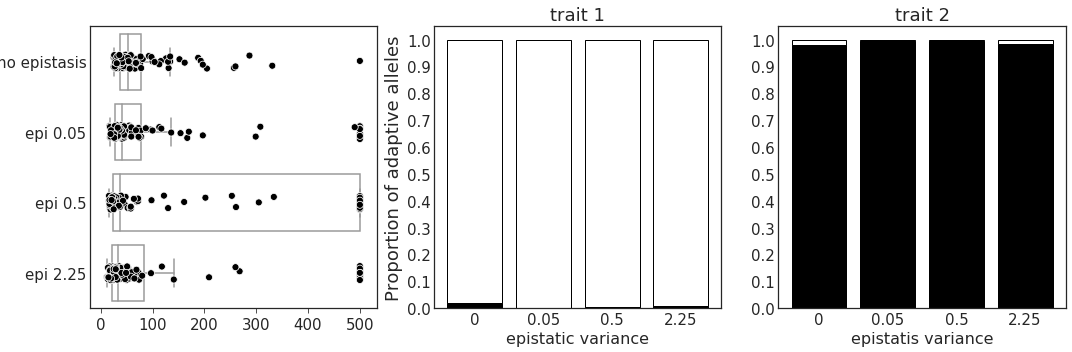

In [8]:
#### Generate box plots of lag phase duration and source of adaptive alleles for epistasis sims ####

data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'epi': 'no epistasis'})
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_epi05_lag.csv').ix[:,2], 'loci': '10 loci', 'epi': 'epi 0.05'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_epi5_lag.csv').ix[:,2], 'loci': '10 loci', 'epi': 'epi 0.5'})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_epi225_lag.csv').ix[:,2], 'loci': '10 loci', 'epi': 'epi 2.25'})])
l10_no_epi=pd.read_csv(path+'opt4_10l_d01_u4_source.csv')
l10_epi=pd.read_csv(path+'opt4_10l_d01_u5_epi05_source.csv')
l10_epi5=pd.read_csv(path+'opt4_10l_d01_u5_epi5_source.csv')
l10_epi225=pd.read_csv(path+'opt4_10l_d01_u5_epi225_source.csv')

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot2grid((1,3), (0,0))
    ax2 = plt.subplot2grid((1,3), (0,1))
    ax3 = plt.subplot2grid((1,3), (0,2))
    
    sns.stripplot(y='epi', x='lag', data=data1, jitter=True, color="black",edgecolor='white', ax = ax1, dodge=True, s=7, linewidth=0.75)
    sns.boxplot(y='epi', x='lag', data=data1, color='white', ax = ax1, showfliers=False)

    l10_no_epi_t1 = np.nanmean(l10_no_epi.ix[:,3])/np.nansum(np.nanmean(l10_no_epi.ix[:,3])+np.nanmean(l10_no_epi.ix[:,5]))  
    l10_epi_t1 = np.nanmean(l10_epi.ix[:,2])/np.nansum(np.nanmean(l10_epi.ix[:,2])+np.nanmean(l10_epi.ix[:,3]))
    l10_epi5_t1 = np.nanmean(l10_epi5.ix[:,2])/np.nansum(np.nanmean(l10_epi5.ix[:,2])+np.nanmean(l10_epi5.ix[:,3]))
    l10_epi225_t1 = np.nanmean(l10_epi225.ix[:,2])/np.nansum(np.nanmean(l10_epi225.ix[:,2])+np.nanmean(l10_epi225.ix[:,3]))
    t1_blackbars=[l10_no_epi_t1,l10_epi_t1,l10_epi5_t1,l10_epi225_t1]
    
    l10_no_epi_t1 = np.nanmean(l10_no_epi.ix[:,5])/np.sum(np.nanmean(l10_no_epi.ix[:,3])+np.nanmean(l10_no_epi.ix[:,5]))  
    l10_epi_t1 = np.nanmean(l10_epi.ix[:,3])/np.sum(np.nanmean(l10_epi.ix[:,2])+np.nanmean(l10_epi.ix[:,3]))
    l10_epi5_t1 = np.nanmean(l10_epi5.ix[:,3])/np.sum(np.nanmean(l10_epi5.ix[:,2])+np.nanmean(l10_epi5.ix[:,3]))
    l10_epi225_t1 = np.nanmean(l10_epi225.ix[:,3])/np.sum(np.nanmean(l10_epi225.ix[:,2])+np.nanmean(l10_epi225.ix[:,3]))
    t1_whitebars=[l10_no_epi_t1,l10_epi_t1,l10_epi5_t1,l10_epi225_t1]
    
    l10_no_epi_t2 = np.nanmean(l10_no_epi.ix[:,7])/np.sum(np.nanmean(l10_no_epi.ix[:,7])+np.nanmean(l10_no_epi.ix[:,9]))  
    l10_epi_t2 = np.nanmean(l10_epi.ix[:,5])/np.sum(np.nanmean(l10_epi.ix[:,5])+np.nanmean(l10_epi.ix[:,6]))
    l10_epi5_t2 = np.nanmean(l10_epi5.ix[:,5])/np.sum(np.nanmean(l10_epi5.ix[:,5])+np.nanmean(l10_epi5.ix[:,6]))
    l10_epi225_t2 = np.nanmean(l10_epi225.ix[:,5])/np.sum(np.nanmean(l10_epi225.ix[:,5])+np.nanmean(l10_epi225.ix[:,6]))
    t2_blackbars=[l10_no_epi_t2,l10_epi_t2,l10_epi5_t2,l10_epi225_t2]
    
    l10_no_epi_t2 = np.nanmean(l10_no_epi.ix[:,9])/np.sum(np.nanmean(l10_no_epi.ix[:,7])+np.nanmean(l10_no_epi.ix[:,9]))  
    l10_epi_t2 = np.nanmean(l10_epi.ix[:,6])/np.sum(np.nanmean(l10_epi.ix[:,5])+np.nanmean(l10_epi.ix[:,6]))
    l10_epi5_t2 = np.nanmean(l10_epi5.ix[:,6])/np.sum(np.nanmean(l10_epi5.ix[:,5])+np.nanmean(l10_epi5.ix[:,6]))
    l10_epi225_t2 = np.nanmean(l10_epi225.ix[:,6])/np.sum(np.nanmean(l10_epi225.ix[:,5])+np.nanmean(l10_epi225.ix[:,6]))
    t2_whitebars=[l10_no_epi_t2,l10_epi_t2,l10_epi5_t2,l10_epi225_t2]
    
    N = 4
    ind = np.arange(N)
    width = 0.8
    ax2.bar(ind, t1_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax2.bar(ind, t1_whitebars, width, bottom=t1_blackbars, color='white', linewidth=1, edgecolor='black')
    ax3.bar(ind, t2_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax3.bar(ind, t2_whitebars, width, bottom=t2_blackbars, color='white', linewidth=1, edgecolor='black')
    ax1.set_title('Colonization lag phase duration', fontsize=18)
    ax2.set_title('trait 1', fontsize=18)
    ax3.set_title('trait 2', fontsize=18)
    ax2.set_ylabel('Proportion of adaptive alleles', fontsize=18)
    ax2.set_xlabel('epistatic variance', fontsize=16)
    ax3.set_xlabel('epistatis variance', fontsize=16)
    ax2.set_yticks(np.arange(0,1.1,0.1))
    ax3.set_yticks(np.arange(0,1.1,0.1))
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    ax3.tick_params(axis='x', labelsize=15)
    ax3.tick_params(axis='y', labelsize=15)
    ax2.set_xticks(np.arange(0,4,1))
    ax3.set_xticks(np.arange(0,4,1))
    ax2.set_xticklabels(['0','0.05','0.5','2.25'])
    ax3.set_xticklabels(['0','0.05','0.5','2.25'])
    
    ax1.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax1.tick_params(axis='y', labelsize=15)
    ax1.set_xticks(np.arange(0,520,100))
    ax1.set_xlabel('', fontsize=16)
    ax1.set_title('', fontsize=20)
    ax1.set_ylabel('', fontsize=20)
    plt.tight_layout()
    plt.savefig(path+'epistasis.png')


C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\BReat\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\BReat\Anaconda3\lib\site-packages\ipyke

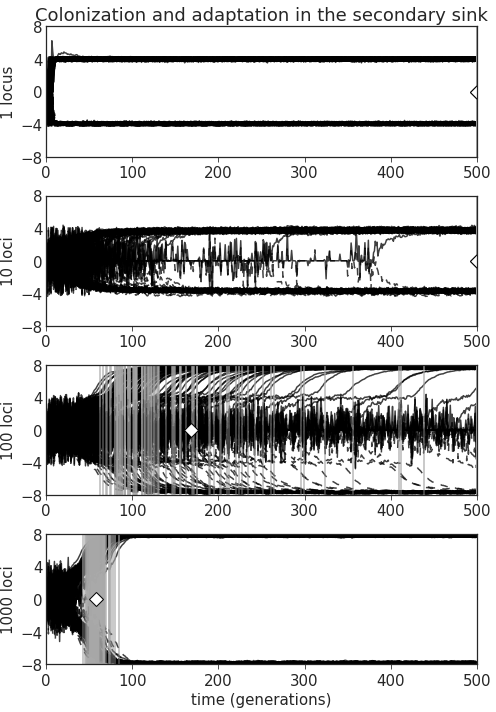

In [11]:
#### Generate adaptation to the secondary sink plot ####

def lagphase(data):
    lag = []
    rep_counter = 1
    row = 0
    while rep_counter <= reps:
        if rep_counter == data.ix[row,0]:
            for line in range(520):
                if data.ix[line+row,5] == 1000:
                    lag.append(data.ix[line+row,1]-10000)
                    rep_counter = rep_counter+1
                    break
                elif line == 519:
                    lag.append(500)
                    rep_counter = rep_counter+1
                    break
        elif rep_counter != data.ix[row,0]:
            while rep_counter != data.ix[row,0]:
                row = row+1
    return lag

def swamping(data):    
    rep_counter = 1
    row = 0
    trait1swamp = pd.DataFrame({'generation': list(range(1,500))})
    trait2swamp = pd.DataFrame({'generation': list(range(1,500))})
    while rep_counter <= reps:
        if rep_counter == data.ix[row,0]:
            trait1 = []
            trait2 = []          
            while rep_counter == data.ix[row,0]:
                if data.ix[row,1] > 10001 and data.ix[row,1] < 10500:
                    trait1.append(data.ix[row,9])
                    trait2.append(data.ix[row,13])
                    row = row+1
                elif data.ix[row,1] == 10500:
                    trait1.append(data.ix[row,9])
                    trait2.append(data.ix[row,13])
                    trait1swamp = pd.concat([trait1swamp, pd.DataFrame({''.join(['t1replicate',str(rep_counter)]): trait1})], axis=1)
                    trait2swamp = pd.concat([trait2swamp, pd.DataFrame({''.join(['t2replicate',str(rep_counter)]): trait2})], axis=1)
                    rep_counter = rep_counter+1
                else:
                    row = row+1
        elif rep_counter == data.ix[row,0]+1:
            while rep_counter == data.ix[row,0]+1:
                row = row+1
    mean_t1 = []
    mean_t2 = []
    for row in range(trait1swamp.shape[0]): mean_t1.append((sum(trait1swamp.ix[row,1:(reps+1)]))/reps)
    trait1swamp = pd.concat([trait1swamp, pd.DataFrame({'mean': mean_t1})], axis=1)
    for row in range(trait2swamp.shape[0]): mean_t2.append((sum(trait2swamp.ix[row,1:(reps+1)]))/reps)
    trait2swamp = pd.concat([trait2swamp, pd.DataFrame({'mean': mean_t2})], axis=1)
    out = [trait1swamp, trait2swamp]
    return out

l1_d01 = pd.read_table(path+'opt4_1l_d01_u4_trans_stats.txt', delim_whitespace = True)
l10_d01 = pd.read_table(path+'opt4_10l_d01_u4_trans_stats.txt', delim_whitespace = True)
l100_d01 = pd.read_table(path+'opt4_100l_d01_u4_trans_stats.txt', delim_whitespace = True)
l1000_d01 = pd.read_table(path+'opt4_1000l_d01_u4_trans_stats.txt', delim_whitespace = True)
reps=100
swamp1 = swamping(l1_d01)
swamp10 = swamping(l10_d01)
swamp100 = swamping(l100_d01)
swamp1000 = swamping(l1000_d01)
data1 = lagphase(l1_d01)
data10 = lagphase(l10_d01)
data100 = lagphase(l100_d01)
data1000 = lagphase(l1000_d01)

gens = 'black'
lags = 'darkgrey'

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7,10))
    ax1 = plt.subplot2grid((4,1), (0,0))
    ax2 = plt.subplot2grid((4,1), (1,0))
    ax3 = plt.subplot2grid((4,1), (2,0))
    ax4 = plt.subplot2grid((4,1), (3,0))
    #### Subplot for 1 locus sims
    for trait in swamp1[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax1.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax1.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data1)):
            ax1.axvline(int(data1[rep]), color=lags, alpha=0.5)
        ax1.plot(np.mean(data1), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')
    #### Subplot for 10 locus sims
    for trait in swamp10[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax2.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax2.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data10)):
            ax2.axvline(int(data10[rep]), color=lags, alpha=0.5)
        ax2.plot(np.mean(data10), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')
    #### Subplot for 100 locus sims
    for trait in swamp100[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax3.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax3.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data100)):
            ax3.axvline(int(data100[rep]), color=lags, alpha=0.5)
        ax3.plot(np.mean(data100), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')

    #### Subplot for 1000 locus sims
    for trait in swamp1000[:]:
        if trait.columns[1] == 't1replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax4.plot('generation', str(column), data = trait, color=gens, alpha=0.75, label='_nolegend_')
        elif trait.columns[1] == 't2replicate1':
            for column in trait.columns:
                if column == 'generation':
                    continue
                elif column != 'mean':
                    ax4.plot('generation', str(column), data = trait, dashes=[5,5], color=gens, alpha=0.75, label='_nolegend_')
        for rep in range(len(data1000)):
            ax4.axvline(int(data1000[rep]), color=lags, alpha=0.5)
        ax4.plot(np.mean(data1000), 0, 'D', color='white', markersize=10, markeredgewidth=1,markeredgecolor='black')

        ax1.set_title('Colonization and adaptation in the secondary sink', fontsize=18)
        ax1.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax1.tick_params(axis='y', labelsize=15)
        ax1.set_ylabel('1 locus', fontsize=15)
        ax2.set_ylabel('10 loci', fontsize=15)
        ax2.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax2.tick_params(axis='y', labelsize=15)
        ax3.set_ylabel('100 loci', fontsize=15)
        ax3.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax3.tick_params(axis='y', labelsize=15)
        ax4.set_ylabel('1000 loci', fontsize=15)
        ax4.tick_params(axis='x', labelsize=15, direction='out', length=5)
        ax4.tick_params(axis='y', labelsize=15)
        ax4.set_xlabel('time (generations)', fontsize=15)
        ax1.set_xlim([0, 500])
        ax2.set_xlim([0, 500])
        ax3.set_xlim([0, 500])
        ax4.set_xlim([0, 500])
        ax1.set_ylim([-8, 8])
        ax2.set_ylim([-8, 8])
        ax3.set_ylim([-8, 8])
        ax4.set_ylim([-8, 8])
        ax1.set_yticks(np.arange(-8,8.1,4))
        ax2.set_yticks(np.arange(-8,8.1,4))
        ax3.set_yticks(np.arange(-8,8.1,4))
        ax4.set_yticks(np.arange(-8,8.1,4))
        ax1.legend(loc = 'center right', fontsize = 14)
        plt.tight_layout()
        plt.savefig(path+'transadaptation.png')


C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

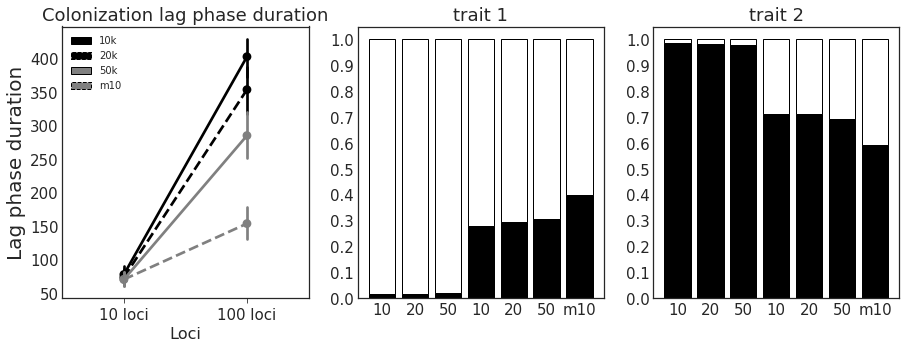

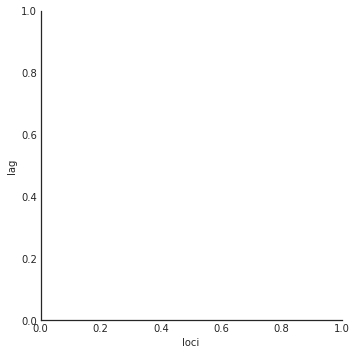

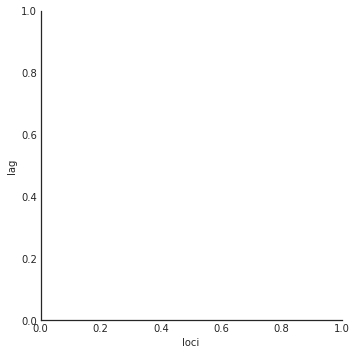

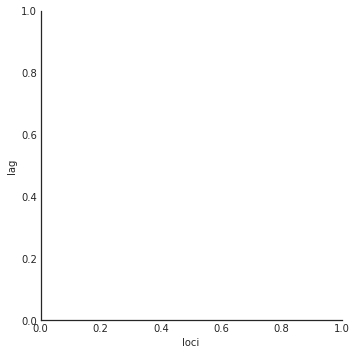

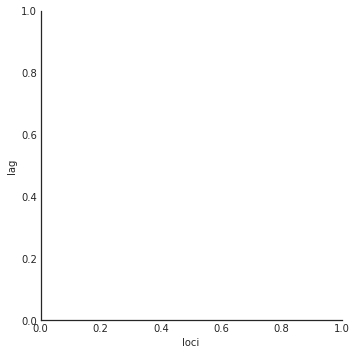

In [9]:
#### Generate lag plot and source of adaptive alleles for 10/20/50k burnin and mu variance sims ####

data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data2 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_20k_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_20k_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data3 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_50k_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})
data3 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_50k_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])
data4 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'zopt': 4})
data4 = pd.concat([data3, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_m10_lag.csv').ix[:,2], 'loci': '100 loci', 'zopt': 4})])

l10_10=pd.read_csv(path+'opt4_10l_d001_u5_source.csv')
l10_20=pd.read_csv(path+'opt4_10l_d001_u5_20k_source.csv')
l10_50=pd.read_csv(path+'opt4_10l_d001_u5_50k_source.csv')
l100_10=pd.read_csv(path+'opt4_100l_d001_u5_source.csv')
l100_20=pd.read_csv(path+'opt4_100l_d001_u5_20k_source.csv')
l100_50=pd.read_csv(path+'opt4_100l_d001_u5_50k_source.csv')
l100_m10=pd.read_csv(path+'opt4_100l_d001_u5_m10_source.csv')

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot2grid((1,3), (0,0))
    ax2 = plt.subplot2grid((1,3), (0,1))
    ax3 = plt.subplot2grid((1,3), (0,2))
    
    sns.catplot(y='lag', x='loci', data=data1, ax=ax1, kind="point", n_boot=1000, markers="o", s=10, linewidth=0.75, color="black")
    sns.catplot(y='lag', x='loci', data=data2, ax=ax1, kind="point", n_boot=1000, markers='o', s=10, linestyles="--", color="black", linewidth=0.75)
    sns.catplot(y='lag', x='loci', data=data3, ax=ax1, kind="point", n_boot=1000, markers='o', s=10, color="grey", linewidth=0.75)
    sns.catplot(y='lag', x='loci', data=data4, ax=ax1, kind="point", n_boot=1000, markers='o', s=10, linestyles="--", color="grey", linewidth=0.75)

    ax1.tick_params(axis='x', labelsize=15, direction='out', length=5)
    ax1.tick_params(axis='y', labelsize=15)
    #ax1.set_xticks(np.arange(0,520,100))
    ax1.set_xlabel('Loci', fontsize=16)
    #ax1.set_title('', fontsize=20)
    ax1.set_ylabel('Lag phase duration', fontsize=20)
    legend_summary = [Patch(facecolor='black', edgecolor='black', label= '10k'),
             Patch(facecolor='black', edgecolor='black', label= '20k', linestyle='--'),
             Patch(facecolor='grey', edgecolor='black', label= '50k'),
             Patch(facecolor='grey', edgecolor='black', label= 'm10', linestyle='--')]
    ax1.legend(handles=legend_summary, loc='upper left')
    #plt.tight_layout()

    
    dispersal = '01'
    
    #### Trait 1 source ####
    l10_10_t1 = np.mean(l10_10.ix[:,3])/np.sum(np.mean(l10_10.ix[:,3])+np.mean(l10_10.ix[:,5]))      
    l10_20_t1 = np.mean(l10_20.ix[:,3])/np.sum(np.mean(l10_20.ix[:,3])+np.mean(l10_20.ix[:,5]))  
    l10_50_t1 = np.mean(l10_50.ix[:,3])/np.sum(np.mean(l10_50.ix[:,3])+np.mean(l10_50.ix[:,5]))
    l100_10_t1 = np.mean(l100_10.ix[:,3])/np.sum(np.mean(l100_10.ix[:,3])+np.mean(l100_10.ix[:,5]))
    l100_20_t1 = np.mean(l100_20.ix[:,3])/np.sum(np.mean(l100_20.ix[:,3])+np.mean(l100_20.ix[:,5]))
    l100_50_t1 = np.mean(l100_50.ix[:,3])/np.sum(np.mean(l100_50.ix[:,3])+np.mean(l100_50.ix[:,5]))
    l100_m10_t1 = np.mean(l100_m10.ix[:,3])/np.sum(np.mean(l100_m10.ix[:,3])+np.mean(l100_m10.ix[:,5]))
    t1_blackbars=[l10_10_t1,l10_20_t1,l10_50_t1,l100_10_t1,l100_20_t1,l100_50_t1,l100_m10_t1]

    l10_10_t1 = np.mean(l10_10.ix[:,5])/np.sum(np.mean(l10_10.ix[:,3])+np.mean(l10_10.ix[:,5]))      
    l10_20_t1 = np.mean(l10_20.ix[:,5])/np.sum(np.mean(l10_20.ix[:,3])+np.mean(l10_20.ix[:,5]))  
    l10_50_t1 = np.mean(l10_50.ix[:,5])/np.sum(np.mean(l10_50.ix[:,3])+np.mean(l10_50.ix[:,5]))
    l100_10_t1 = np.mean(l100_10.ix[:,5])/np.sum(np.mean(l100_10.ix[:,3])+np.mean(l100_10.ix[:,5]))
    l100_20_t1 = np.mean(l100_20.ix[:,5])/np.sum(np.mean(l100_20.ix[:,3])+np.mean(l100_20.ix[:,5]))
    l100_50_t1 = np.mean(l100_50.ix[:,5])/np.sum(np.mean(l100_50.ix[:,3])+np.mean(l100_50.ix[:,5]))
    l100_m10_t1 = np.mean(l100_m10.ix[:,5])/np.sum(np.mean(l100_m10.ix[:,3])+np.mean(l100_m10.ix[:,5]))
    t1_whitebars=[l10_10_t1,l10_20_t1,l10_50_t1,l100_10_t1,l100_20_t1,l100_50_t1,l100_m10_t1]
    
    #### Trait 2 source ####
    l10_10_t2 = np.mean(l10_10.ix[:,7])/np.sum(np.mean(l10_10.ix[:,7])+np.mean(l10_10.ix[:,9]))      
    l10_20_t2 = np.mean(l10_20.ix[:,7])/np.sum(np.mean(l10_20.ix[:,7])+np.mean(l10_20.ix[:,9]))  
    l10_50_t2 = np.mean(l10_50.ix[:,7])/np.sum(np.mean(l10_50.ix[:,7])+np.mean(l10_50.ix[:,9]))
    l100_10_t2 = np.mean(l100_10.ix[:,7])/np.sum(np.mean(l100_10.ix[:,7])+np.mean(l100_10.ix[:,9]))
    l100_20_t2 = np.mean(l100_20.ix[:,7])/np.sum(np.mean(l100_20.ix[:,7])+np.mean(l100_20.ix[:,9]))
    l100_50_t2 = np.mean(l100_50.ix[:,7])/np.sum(np.mean(l100_50.ix[:,7])+np.mean(l100_50.ix[:,9]))
    l100_m10_t2 = np.mean(l100_m10.ix[:,7])/np.sum(np.mean(l100_m10.ix[:,7])+np.mean(l100_m10.ix[:,9]))
    t2_blackbars=[l10_10_t2,l10_20_t2,l10_50_t2,l100_10_t2,l100_20_t2,l100_50_t2,l100_m10_t2]
    
    l10_10_t2 = np.mean(l10_10.ix[:,9])/np.sum(np.mean(l10_10.ix[:,7])+np.mean(l10_10.ix[:,9]))      
    l10_20_t2 = np.mean(l10_20.ix[:,9])/np.sum(np.mean(l10_20.ix[:,7])+np.mean(l10_20.ix[:,9]))  
    l10_50_t2 = np.mean(l10_50.ix[:,9])/np.sum(np.mean(l10_50.ix[:,7])+np.mean(l10_50.ix[:,9]))
    l100_10_t2 = np.mean(l100_10.ix[:,9])/np.sum(np.mean(l100_10.ix[:,7])+np.mean(l100_10.ix[:,9]))
    l100_20_t2 = np.mean(l100_20.ix[:,9])/np.sum(np.mean(l100_20.ix[:,7])+np.mean(l100_20.ix[:,9]))
    l100_50_t2 = np.mean(l100_50.ix[:,9])/np.sum(np.mean(l100_50.ix[:,7])+np.mean(l100_50.ix[:,9]))
    l100_m10_t2 = np.mean(l100_m10.ix[:,9])/np.sum(np.mean(l100_m10.ix[:,7])+np.mean(l100_m10.ix[:,9]))
    t2_whitebars=[l10_10_t2,l10_20_t2,l10_50_t2,l100_10_t2,l100_20_t2,l100_50_t2,l100_m10_t2] 
 
    N = 7
    ind = np.arange(N)
    width = 0.8
    ax2.bar(ind, t1_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax2.bar(ind, t1_whitebars, width, bottom=t1_blackbars, color='white', linewidth=1, edgecolor='black')
    ax3.bar(ind, t2_blackbars, width, color='black', linewidth=1, edgecolor='black')
    ax3.bar(ind, t2_whitebars, width, bottom=t2_blackbars, color='white', linewidth=1, edgecolor='black')
    ax1.set_title('Colonization lag phase duration', fontsize=18)
    ax2.set_title('trait 1', fontsize=18)
    ax3.set_title('trait 2', fontsize=18)
    #ax2.set_ylabel('Total contribution to adaptation', fontsize=18)
    ax2.set_yticks(np.arange(0,1.1,0.1))
    ax3.set_yticks(np.arange(0,1.1,0.1))
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    ax3.tick_params(axis='x', labelsize=15)
    ax3.tick_params(axis='y', labelsize=15)
    ax2.set_xticks(np.arange(0,7,1))
    ax3.set_xticks(np.arange(0,7,1))
    ax2.set_xticklabels(['10','20','50','10','20','50','m10'])
    ax3.set_xticklabels(['10','20','50','10','20','50','m10'])
    plt.tight_layout()
    plt.savefig(path+'burn.png')

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-

C:\Users\BReat\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


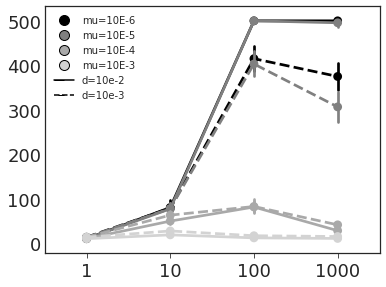

In [10]:
## Mutation rate and dispersal interaction plots ##

data1 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u3_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -3})
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u3_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u3_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u3_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -3})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -4})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -5})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d01_u6_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -6})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d01_u6_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -6})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d01_u6_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -6})])
data1 = pd.concat([data1, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d01_u6_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -6})])

data2 = pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u3_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -3})
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u3_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u3_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u3_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -3})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u4_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u4_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u4_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u4_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -4})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u5_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u5_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u5_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u5_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -5})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1l_d001_u6_lag.csv').ix[:,2], 'loci': '1 locus', 'mu': -6})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_10l_d001_u6_lag.csv').ix[:,2], 'loci': '10 loci', 'mu': -6})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_100l_d001_u6_lag.csv').ix[:,2], 'loci': '100 loci', 'mu': -6})])
data2 = pd.concat([data2, pd.DataFrame({'lag': pd.read_csv(path+'opt4_1000l_d001_u6_lag.csv').ix[:,2], 'loci': '1000 loci', 'mu': -6})])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(6,10))
    ax1 = plt.subplot2grid((2,1), (0,0))    
    sns.catplot(y='lag', x='loci', data=data1, ax=ax1, hue='mu', kind="point", n_boot=1000, markers="o", s=10, palette={-3:'lightgrey',-4:'darkgrey',-5:'grey',-6:'black'}, linewidth=0.75)
    sns.catplot(y='lag', x='loci', data=data2, ax=ax1, hue='mu', kind="point", n_boot=1000, markers='o', s=10, linestyles="--", palette={-3:'lightgrey',-4:'darkgrey',-5:'grey',-6:'black'}, linewidth=0.75)
    legend_summary = [Line2D([0],[0], marker='o', markerfacecolor='black',color='white',markeredgecolor='black',markersize=10,label='mu=10E-6'),
              Line2D([0],[0], marker='o', markerfacecolor='grey',color='white',markeredgecolor='black',markersize=10,label='mu=10E-5'),
              Line2D([0],[0], marker='o', markerfacecolor='darkgrey',color='white',markeredgecolor='black',markersize=10,label='mu=10E-4'),
              Line2D([0],[0], marker='o', markerfacecolor='lightgrey',color='white',markeredgecolor='black',markersize=10,label='mu=10E-3'),
              Line2D([0],[0], marker=False, markerfacecolor='white',color='black',markeredgecolor='black',markersize=10,label='d=10e-2'),
              Line2D([0],[0], marker=False, linestyle="--",color='black',label='d=10e-3')]
    ax1.legend(handles=legend_summary, loc='top left')
    ax1.set_ylabel('Lag phase duration', fontsize=18)
    ax1.tick_params(axis='x', labelsize=18, direction='out', length=5)
    ax1.tick_params(axis='y', labelsize=18)
    ax1.set_xlabel('', fontsize=18)
    ax1.set_ylabel('', fontsize=18)
    ax1.set_xticklabels(['1','10','100','1000'])
    plt.close(2)
    plt.close(3)
    plt.close(4)
    plt.close(5)
    plt.savefig(path+'mutation.png')